## GRAPPA reconstruction 
###### Author: Zimu Huo
###### Date: 02.2022


The slice data and reference data are integrated. 

-------------------------------------------------------------------------
References
    
    [1] 
    Author: Mark A. Griswold et al. 
    Title: Generalized Autocalibrating Partially Parallel Acquisitions (GRAPPA)
    Link: https://pubmed.ncbi.nlm.nih.gov/12111967/
    

In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
import util.mask as undersample
from util.fft import *
import util.simulator as simulate
from util.igrappa import *

In [2]:
R = 2
data =  np.load("../lib/slice1_grappa1.npy")
rawImage = ifft2c(data)
dataR = undersample.igrappa(data, R)

In [3]:
recon = igrappa(dataR, R)

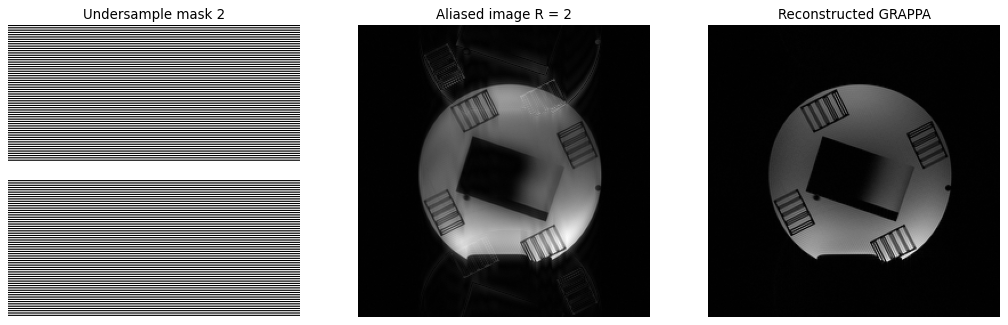

In [4]:
plt.figure(figsize=(16, 12), dpi=80)
plt.subplot(131)
plt.imshow(show_mask(dataR),cmap='gray')
plt.title("Undersample mask "+str(R))
plt.axis('off')
plt.subplot(132)
plt.imshow(np.abs(rsos(ifft2c(dataR))),cmap='gray')
plt.title("Aliased image R = "+str(R))
plt.axis('off')
plt.subplot(133)
plt.axis('off')
plt.imshow(np.abs((recon)),cmap='gray')
plt.title("Reconstructed GRAPPA")
plt.show()